<img src="https://pbs.twimg.com/profile_images/1092394418135539713/eplLRcDN_400x400.jpg" width=80px style="text-align:right"><h1>The Internet of Production Alliance </h1>

## Preliminary data report for the [Make Project](https://makeafricaeu.org/)


Autor: Antonio de Jesus Anaya Hernandez, DevOps eng. for the IoPA.

Autor: The internet of Production Alliance, 2023.

Data was collected by "Fab Foundation", location: https://api.fablabs.io/0/labs.json

The Open Know Where (OKW) Standard is part of the Internet of Production Alliance and its members.

License: CC BY SA

![CC BY SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)

Python code used to download, parse, filter, sort and map the data:

In [1]:
import folium

In [2]:
from folium.plugins import HeatMap

In [3]:
import requests

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
url = "https://api.fablabs.io/0/labs.json"
response = requests.get(url)
data = response.json()

In [8]:
df = pd.DataFrame(data)

In [9]:
df = df[df['activity_status'] == 'active']

In [10]:
df = df.drop(columns=['id', 'kind_name', 'parent_id', 'blurb', 'description', 'slug', 'avatar_url', 'header_url'])

In [11]:
european_countries = {
    'AT': 'Austria',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'CY': 'Cyprus',
    'CZ': 'Czech Republic',
    'DK': 'Denmark',
    'EE': 'Estonia',
    'FI': 'Finland',
    'FR': 'France',
    'DE': 'Germany',
    'GR': 'Greece',
    'HU': 'Hungary',
    'IS': 'Iceland',
    'IE': 'Ireland',
    'IT': 'Italy',
    'LV': 'Latvia',
    'LI': 'Liechtenstein',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'MT': 'Malta',
    'MC': 'Monaco',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SK': 'Slovakia',
    'SI': 'Slovenia',
    'ES': 'Spain',
    'SE': 'Sweden',
    'CH': 'Switzerland',
    'GB': 'United Kingdom',
    'VA': 'Vatican City'
}

In [12]:
europe_codes = european_countries.keys()

In [13]:
pd.DataFrame(df).sort_values('name', ascending=True).to_excel('fablabs.xlsx')

In [14]:
df = df[df['country_code'].isin(europe_codes)]

In [15]:
df = df[df['phone'].notna() & df['email'].notna() & (df['phone'] != '') & (df['email'] != '')]

In [16]:
df = df[df['latitude'].notna() & df['longitude'].notna() & (df['latitude'] != '') & (df['longitude'] != '')]

In [17]:
df.to_csv('make_european_countries.csv', index=False)

In [18]:
avg_lat = df['latitude'].mean()
avg_lon = df['longitude'].mean()
map = folium.Map(location=[avg_lat, avg_lon], zoom_start=3)

In [19]:
HeatMap(data=df[['latitude', 'longitude']].values, radius=8, max_zoom=8).add_to(map)

In [20]:
map

In [21]:
df['country_name'] = df['country_code'].map(european_countries)

In [22]:
result = df.groupby('country_name').size().sort_values(ascending=True)

Text(0, 0.5, 'Country')

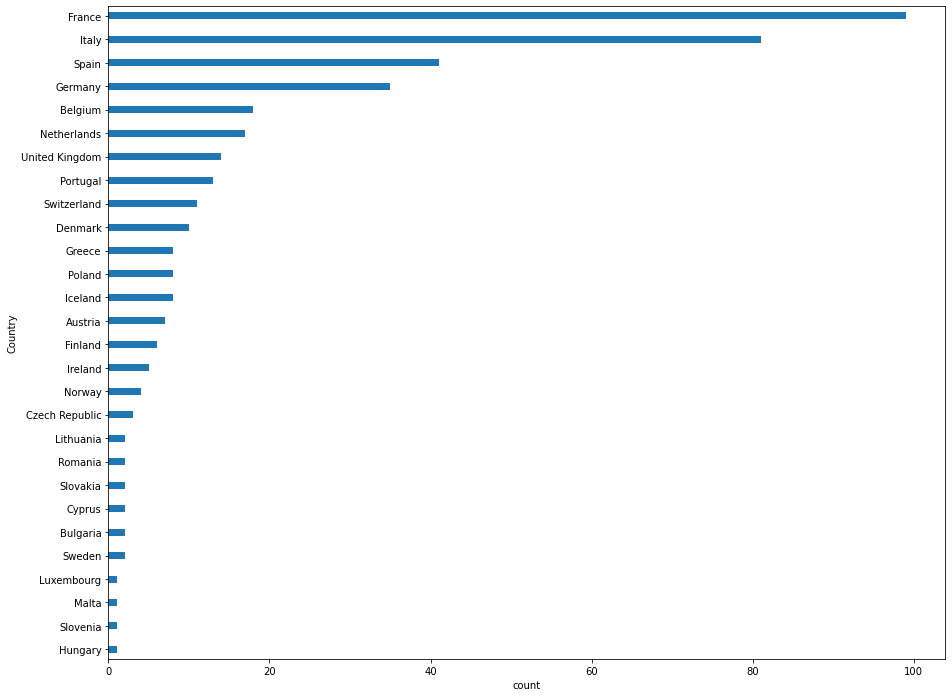

In [23]:
result.plot(kind='barh', rot=0, width=0.3, align='center', figsize=(15,12))
plt.xlabel("count")
plt.ylabel("Country")

In [24]:
# result

In [25]:
print("Countries:\t" + str(result.shape[0]) + " \nTotal fablabs:\t" + str(result.sum()))

Countries:	28 
Total fablabs:	404


In [26]:
df.head()

,name,address_1,address_2,city,county,postal_code,country_code,latitude,longitude,address_notes,phone,email,capabilities,activity_status,links,country_name
18,FabLab du Dôme à Caen,3 Esplanade Stéphane Hessel,Le Dôme,Caen,Normandie,14000,FR,49.181016,-0.347539,Le FabLab est situé au niveau R2.,0261451935,fablab@ledome.info,"[three_d_printing, cnc_milling, circuit_produc...",active,"[{'id': 656, 'url': 'http://www.ledome.info'},...",France
26,Le Prototype - EleFab,57 Fbg Montmélian,,Chambéry,Savoie,73000,FR,45.566169,5.926768,,0033634539788,fablab@simplix.fr,"[three_d_printing, cnc_milling, laser]",active,"[{'id': 4790, 'url': 'http://leprototype.info'...",France
32,WoMa,15 bis Rue Léon Giraud,,Paris,,75019,FR,48.887851,2.382753,"Step in, it's open !",+33 1 40 18 59 21,hello@woma.fr,"[three_d_printing, cnc_milling, circuit_produc...",active,"[{'id': 1024, 'url': 'https://woma.fr'}]",France
59,Fablab Leoben,Langgasse 11,,Leoben,,8700,AT,47.381001,15.096260,,+43 664 5738600,office@fablab-leoben.at,"[three_d_printing, cnc_milling, circuit_produc...",active,"[{'id': 2062, 'url': 'http://www.fablab-Leoben...",Austria
61,fablab iMAL,30-34 Quai des Charbonnages Koolmijnenkaai,,Brussels,,1080,BE,50.855130,4.342420,Enter by the number 30.\r\nIt's on the first f...,+32 2 410 30 93,fablab@imal.org,"[three_d_printing, cnc_milling, laser, precisi...",active,"[{'id': 25, 'url': 'http://www.imal.org/fablab...",Belgium


In [27]:
df = df.reset_index(drop=False)

In [28]:
pd.DataFrame(df).sort_values('name', ascending=True).to_excel('labs.xlsx')

In [29]:
capabilities = {machine for row in df['capabilities'] for machine in row}

In [30]:
df = df.join(df['capabilities'].apply(set).apply(lambda x: pd.Series({item: item in x for item in capabilities})))

In [31]:
machine_count = {item:df[item].sum() for item in capabilities}
print(machine_count)

{'three_d_printing': 401, 'laser': 371, 'precision_milling': 259, 'cnc_milling': 344, 'circuit_production': 258, 'vinyl_cutting': 322}


Minimun machine count: 1955


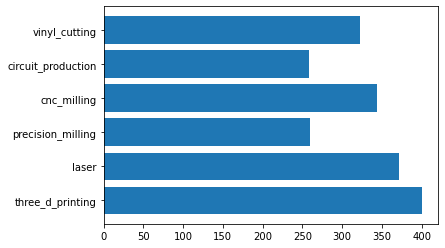

In [32]:
plt.barh(*zip(*machine_count.items()))
print("Minimun machine count: " + str(sum(machine_count.values())))